In [1]:
import seaborn as sns
from sklearn.cluster import k_means
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
airlines=pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
airlines

<IPython.core.display.Javascript object>

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# renaming column names with meaning full names
airlines = airlines.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
# Checking for all the values in dataset of type integer, if not replacing them with nan
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [6]:
check_int(airlines[airlines.columns])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
airlines.isnull().sum()


ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [8]:
airlines.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<IPython.core.display.Javascript object>

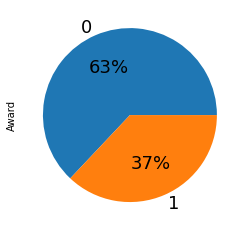

In [9]:
airlines['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

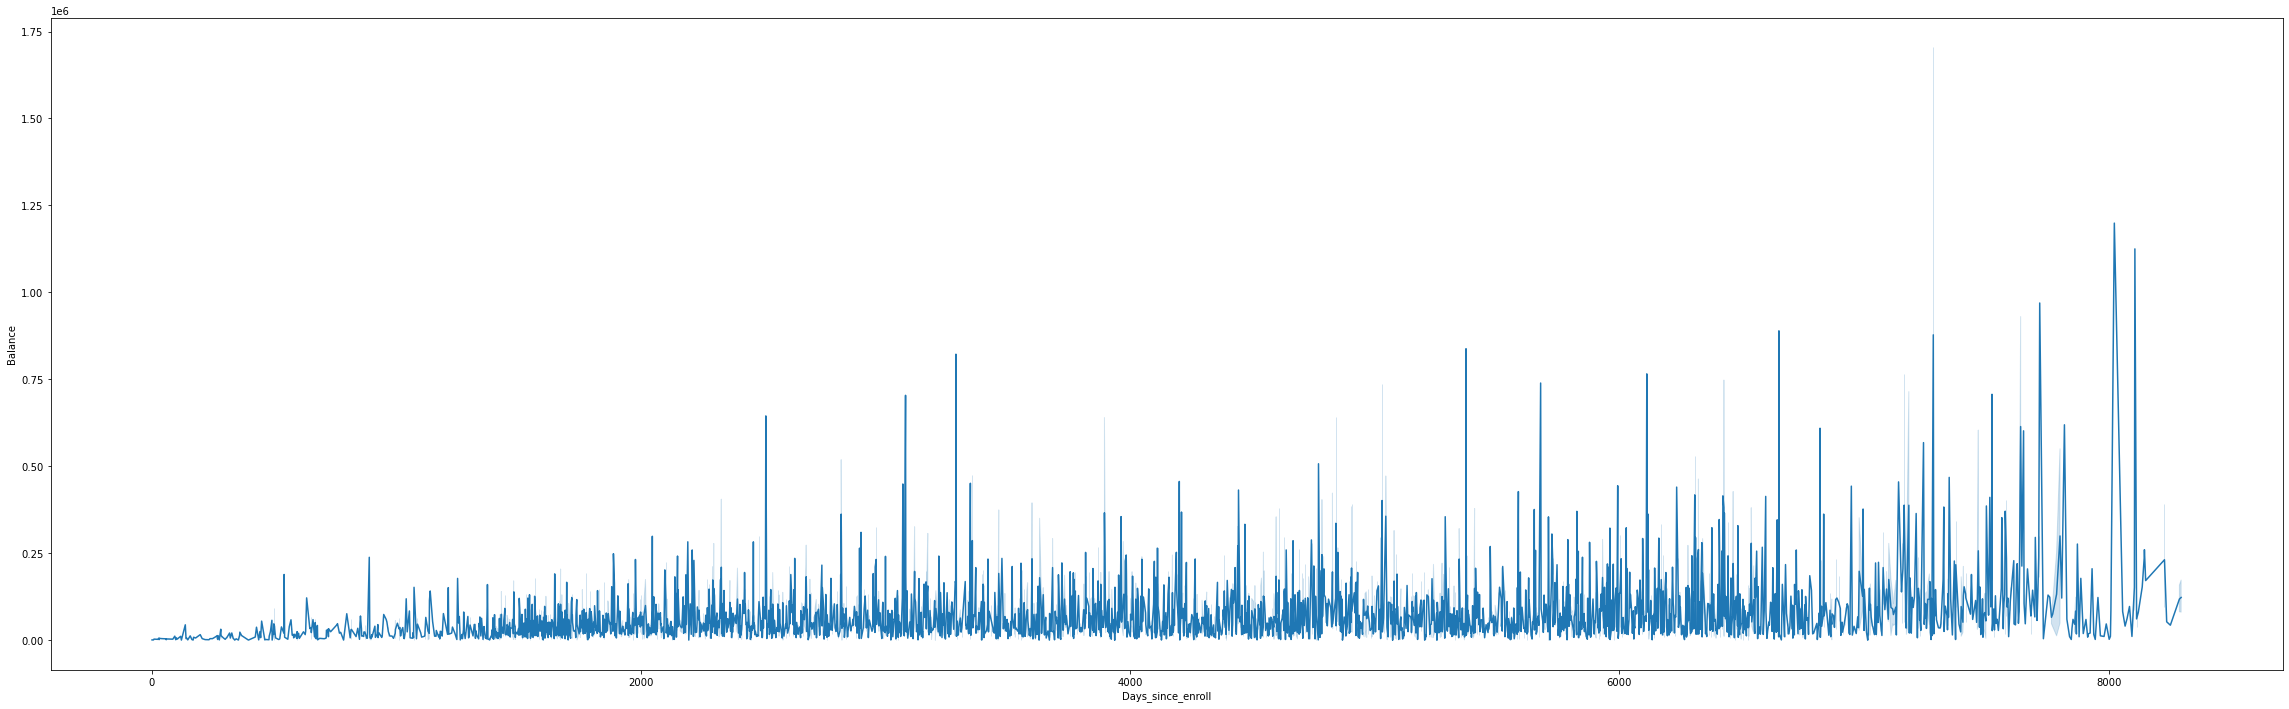

In [10]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = airlines)
# plt.plot(airlines['Days_since_enroll'])
plt.show()

# Hierachial clustering (or) Agglomerative Clustering


In [11]:
airlines1 = airlines.drop('ID', axis = 1)
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
scaler=MinMaxScaler()
new_features=scaler.fit_transform(airlines1.iloc[:,:11])  
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
model=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
cluster_numbers=model.fit_predict(new_features)
new_features

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [14]:
cluster_numbers

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [15]:
# silhouette score
sil_score= silhouette_score(new_features, model.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.5318787367232326


<IPython.core.display.Javascript object>

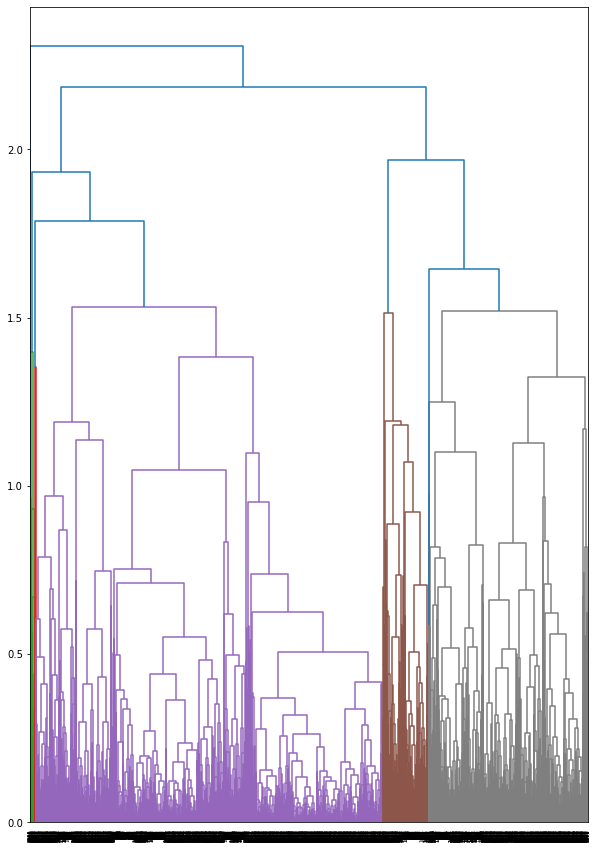

In [16]:
# create dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 15))  
dendograms=sch.dendrogram(sch.linkage(new_features,'complete'))


# K_means clustering

In [17]:
model=KMeans(n_clusters=3)
cluster_numbers=model.fit_predict(new_features)

<IPython.core.display.Javascript object>

In [18]:
airlines1['Cluster_tag']=cluster_numbers

In [19]:
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_tag
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [20]:
airlines1['Cluster_tag'].value_counts()

2    1897
1    1481
0     621
Name: Cluster_tag, dtype: int64

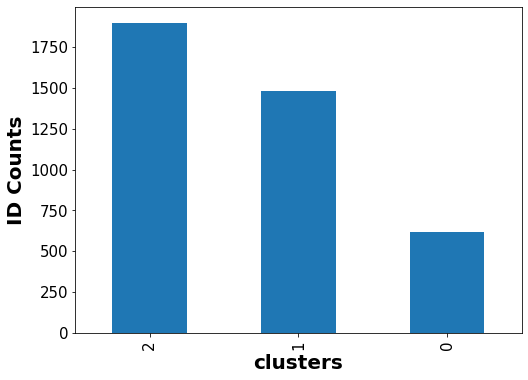

In [21]:
import matplotlib.pyplot as plt

airlines1['Cluster_tag'].value_counts().plot(kind='bar',figsize = (8,6))
plt.xlabel("clusters",loc="center",fontsize= 20,fontweight= "bold")
plt.ylabel("ID Counts",loc="center",fontsize=20,fontweight= "bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


# Elbow method for KMeans to get optimal clusters

In [22]:
nc=range(2,10)
l=[]
for i in nc:
    model=KMeans(i)
    cluster_numbers=model.fit_predict(new_features)     
    l.append(model.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

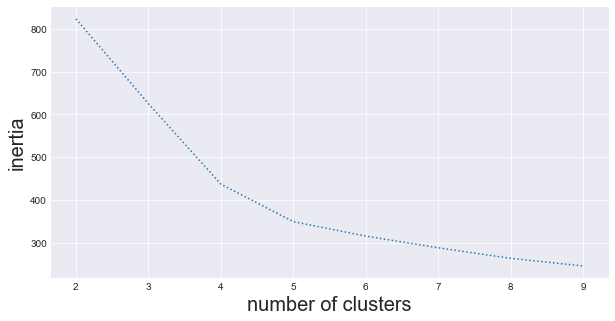

In [23]:
plt.figure(figsize=(10,5))
plt.style.use("seaborn-darkgrid")
plt.plot(nc,l,linestyle=":")
plt.xlabel("number of clusters",size=20)
plt.ylabel("inertia",size=20)
plt.show()

In [24]:
# As per looking at the above elbow graph, we can consider either 4 as the optimal clusters.
model=KMeans(n_clusters=4)
cluster_numbers=model.fit_predict(new_features)

<IPython.core.display.Javascript object>

In [25]:
airlines1['Cluster_tag']=cluster_numbers

In [26]:
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_tag
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


# DB Scan

In [27]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [28]:
# Normalising data using MinMaxScaler
newdata=scaler.fit_transform(airlines)
newdata

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

In [29]:
model = DBSCAN(eps=0.4, min_samples=12)
model.fit(newdata)

DBSCAN(eps=0.4, min_samples=12)

In [30]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
airlines2=pd.DataFrame(model.fit_predict(newdata),columns=['clusterid_DBSCAN'])
airlines2['clusterid_DBSCAN'].value_counts()

<IPython.core.display.Javascript object>

 0    2481
 1    1438
-1      66
 2      14
Name: clusterid_DBSCAN, dtype: int64

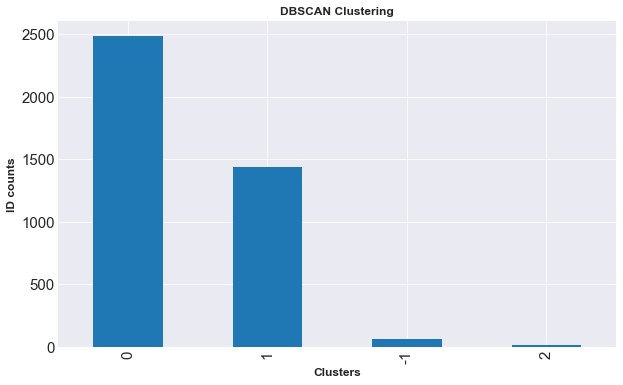

In [32]:

fig, ax = plt.subplots(figsize=(10, 6))
airlines2['clusterid_DBSCAN'].value_counts().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


# As more than 50% of data is in one cluster, we will try for lower value of epsilon

In [33]:
from sklearn.metrics import silhouette_score

# for epsilon = 0.8
model1 = DBSCAN(eps=0.8, min_samples=12)
model1.fit(newdata)

airlines2=pd.DataFrame(model1.fit_predict(newdata),columns=['clusterid_DBSCAN'])
print(airlines2['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(newdata, model1.labels_)
print('silhouette score: ',sil_score)

<IPython.core.display.Javascript object>

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4701970394742716


In [34]:
# for epsilon = 0.7
model1 = DBSCAN(eps=0.7, min_samples=12)
model1.fit(newdata)

airlines2=pd.DataFrame(model1.fit_predict(newdata),columns=['clusterid_DBSCAN'])
print(airlines2['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(newdata, model1.labels_)
print('silhouette score: ',sil_score)

<IPython.core.display.Javascript object>

 0    2516
 1    1479
-1       4
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4697588676378128


In [35]:
# for epsilon = 0.6
model1 = DBSCAN(eps=0.6, min_samples=12)
model1.fit(newdata)

airlines2=pd.DataFrame(model1.fit_predict(newdata),columns=['clusterid_DBSCAN'])
print(airlines2['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(newdata, model1.labels_)
print('silhouette score: ',sil_score)

<IPython.core.display.Javascript object>

 0    2516
 1    1471
-1      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4682009843113833


In [36]:
# for epsilon = 0.55
model1 = DBSCAN(eps=0.55, min_samples=12)
model1.fit(newdata)

airlines2=pd.DataFrame(model1.fit_predict(newdata),columns=['clusterid_DBSCAN'])
print(airlines2['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(newdata, model1.labels_)
print('silhouette score: ',sil_score)

<IPython.core.display.Javascript object>

 0    2516
 1    1466
-1      17
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.46584833318647106


In [37]:
# for epsilon = 0.5
model1 = DBSCAN(eps=0.5, min_samples=12)
model1.fit(newdata)

airlines2=pd.DataFrame(model1.fit_predict(newdata),columns=['clusterid_DBSCAN'])
print(airlines2['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(newdata, model1.labels_)
print('silhouette score: ',sil_score)

<IPython.core.display.Javascript object>

 0    2486
 1    1448
-1      49
 2      16
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.2606538679746577


In [38]:
# for epsilon = 0.3
model1 = DBSCAN(eps=0.3, min_samples=12)
model1.fit(newdata)

airlines2=pd.DataFrame(model1.fit_predict(newdata),columns=['clusterid_DBSCAN'])
print(airlines2['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(newdata, model1.labels_)
print('silhouette score: ',sil_score)

<IPython.core.display.Javascript object>

 0    2466
 1    1395
-1     138
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4442817249084411
